In [63]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
url = 'https://uk.wikipedia.org/wiki/Населення_України#Народжуваність'
response = requests.get(url)
html = response.text

read_data = pd.read_html(html, decimal=',', thousands='.', encoding='utf-8')

In [65]:
my_data = read_data[12]

Вивести перші рядки таблиці за допомогою методу head

In [66]:
my_data.head(26)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,—
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


Визначте кількість рядків та стовпців у датафреймі (атрибут shape)

In [67]:
my_data.shape

(28, 9)

Замініть у таблиці значення "—" на значення NaN

In [68]:
my_data.replace(to_replace='—', value=np.nan, inplace=True)

Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [69]:
my_data.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"

In [70]:
my_data[['2014','2019']] = my_data[['2014','2019']].astype(np.float64)

In [71]:
my_data.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object

Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [72]:
my_data.isnull().sum()

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64

Видаліть з таблиці дані по всій країні, останній рядок таблиці

In [73]:
my_data.drop([27], inplace=True)

Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

In [74]:
my_data = my_data.fillna(my_data.mean(numeric_only=True))

Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

In [75]:
max_index = my_data['2019'].apply(lambda x: x > my_data['2019'].mean())
regions_with_max_index = my_data[max_index]['Регіон']
regions = my_data.loc[regions_with_max_index.index, ['Регіон', '2019']]
print(regions)

               Регіон  2019
2           Волинська  10.1
6        Закарпатська  10.4
8   Івано-Франківська   8.8
12          Львівська   8.7
14            Одеська   8.8
16         Рівненська  10.7
20         Херсонська   8.1
23        Чернівецька   9.2
25               Київ  11.0


У якому регіоні була найвища народжуваність у 2014 році?

In [76]:
max_birthrate_2014 = my_data['2014'].max()
region_with_max_index = my_data[my_data['2014'] == max_birthrate_2014]['Регіон']
print(region_with_max_index)

16    Рівненська
Name: Регіон, dtype: object


Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

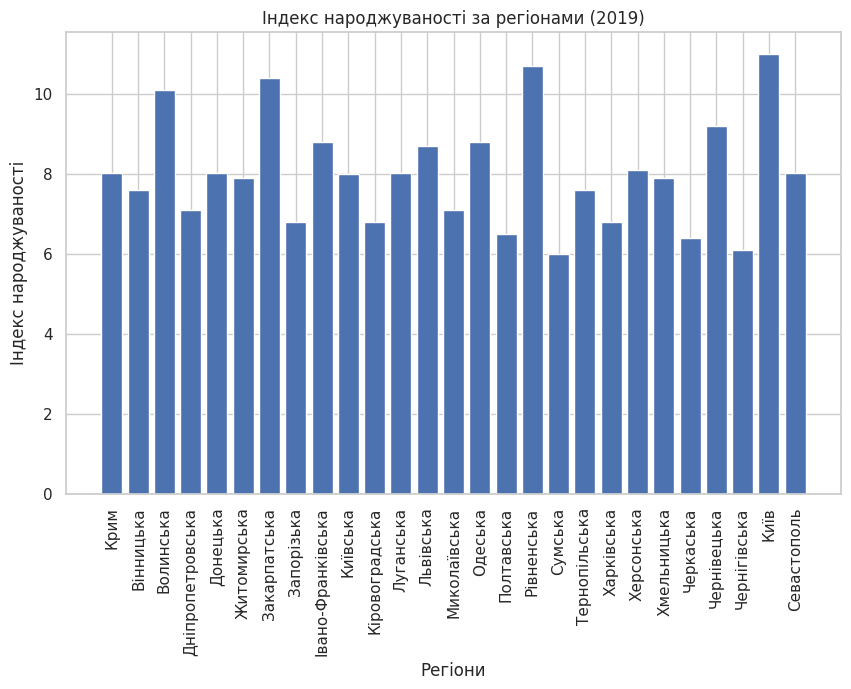

In [77]:
regions = my_data['Регіон'][0:]
birth_rates = my_data['2019'][0:]

plt.figure(figsize=(10, 6))
plt.bar(regions, birth_rates)
plt.xlabel('Регіони')
plt.ylabel('Індекс народжуваності')
plt.title('Індекс народжуваності за регіонами (2019)')
plt.xticks(rotation=90)

plt.show()

In [78]:
my_data.describe()

,1950,1960,1970,1990,2000,2012,2014,2019
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,23.104000,20.757692,15.600000,13.059259,8.222222,11.655556,11.144000,8.017391
std,2.766625,2.935613,1.868772,1.554462,1.584379,1.666718,1.972519,1.364002
min,18.600000,16.300000,12.700000,10.800000,6.100000,9.400000,5.100000,6.000000
25%,21.200000,18.650000,14.400000,12.150000,7.050000,10.300000,10.350000,6.950000
50%,23.000000,20.400000,15.500000,12.600000,7.900000,11.500000,11.144000,8.000000
75%,24.500000,22.050000,16.300000,14.100000,9.000000,12.300000,12.100000,8.750000
max,31.400000,27.300000,20.700000,16.800000,11.800000,15.900000,14.800000,11.000000


Графіки

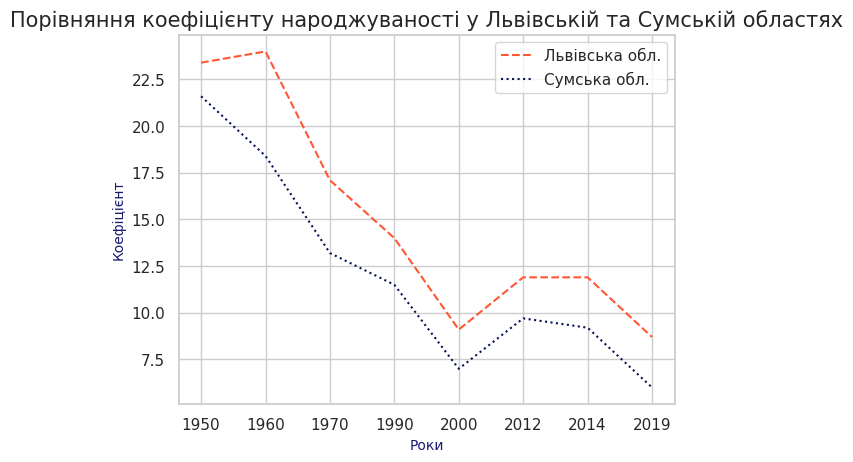

In [79]:
plt.plot(
    my_data.iloc[12, 1:],
    label="Львівська обл.",
    linestyle="--",
    color="#FF5733",
)
plt.plot(
    my_data.iloc[17, 1:],
    label="Сумська обл.",
    linestyle=":",
    color="#061358",
)


plt.xlabel("Роки", fontsize="small", color="midnightblue")
plt.ylabel("Коефіцієнт", fontsize="small", color="midnightblue")
plt.title("Порівняння коефіцієнту народжуваності у Львівській та Сумській областях", fontsize=15)
plt.legend()
plt.show()

In [80]:
my_data.columns

Index(['Регіон', '1950', '1960', '1970', '1990', '2000', '2012', '2014',
       '2019'],
      dtype='object')

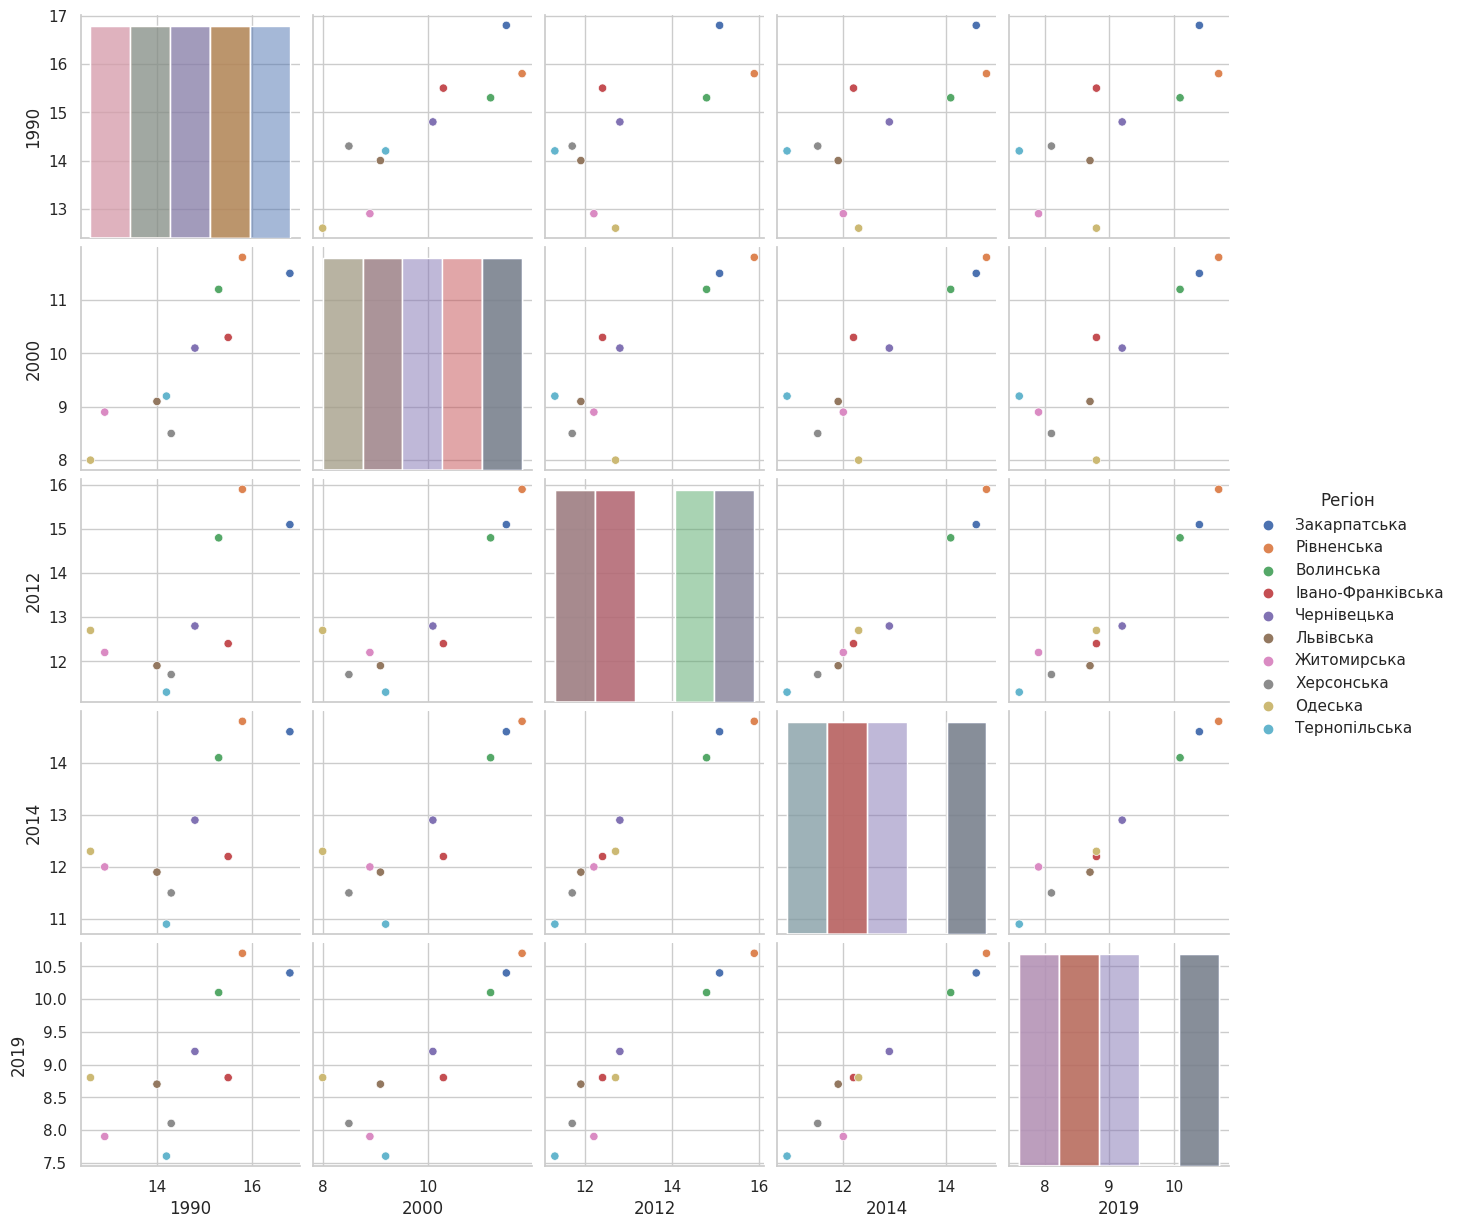

In [81]:
my_data['Mean'] = my_data[['1950', '1960', '1970', '1990', '2000', '2012', '2014',
       '2019']].mean(axis=1)
top_10_regions = my_data.sort_values('Mean', ascending=False).head(10)

sns.set(style="whitegrid")
sns.pairplot(top_10_regions,
             vars = ['1990', '2000', '2012', '2014',
       '2019'],
             hue='Регіон',
             diag_kind='hist'
             )

<Axes: >

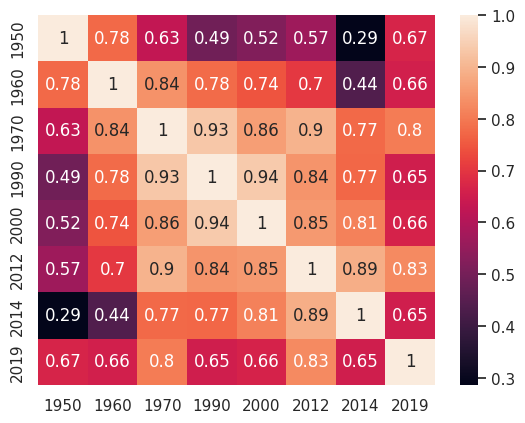

In [85]:
my_data_corr = my_data[['1950', '1960', '1970', '1990', '2000', '2012', '2014', '2019']].dropna().corr()
sns.heatmap(my_data_corr, annot=True)